<a href="https://colab.research.google.com/github/ashiq-056/Clustering/blob/main/AGNES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import queue
import collections
import scipy.io as spio
#from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc 

In [ ]:
df = pd.read_excel("data.xlsx")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79
196,197,Female,0.519231,0.909836,28
197,198,Male,0.269231,0.909836,74
198,199,Male,0.269231,1.000000,18


In [ ]:
T = []
l = list(df['Gender'])
for i in l:
  if i == 'Male':
    T.append(True)
  else:
    T.append(False)

In [ ]:
colors = {True: 'red', False: 'green'}
T_col = [colors[i] for i in T]

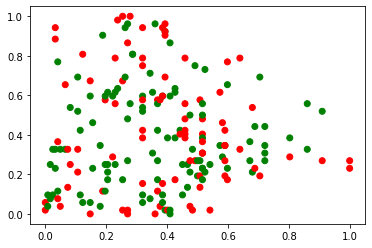

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Age'], c=T_col)

In [ ]:
data = df[['Age', 'Annual Income (k$)']].iloc[: , :].values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

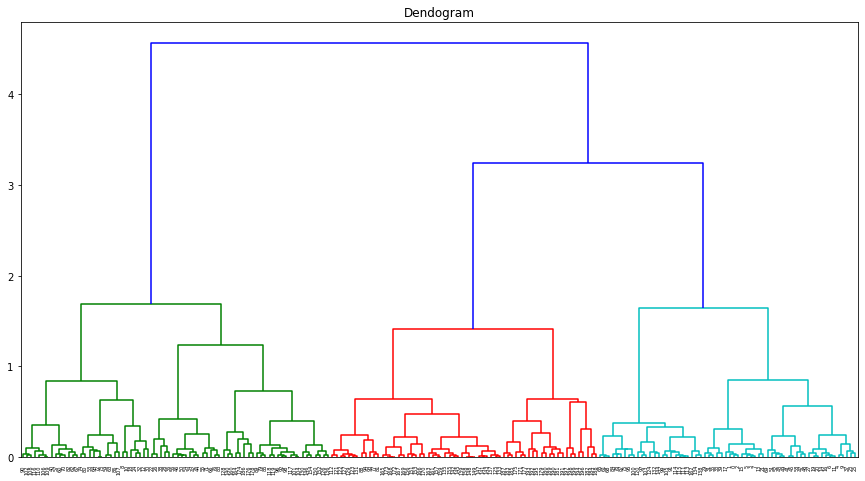

In [ ]:
plt.figure(figsize =(15, 8)) 
plt.title('Dendogram') 
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))
from google.colab import files
plt.savefig("Dendogram.png")
files.download("Dendogram.png")

In [ ]:
colors = {
          0: 'green',
          1: 'red',
          2: 'blue',
          3: 'pink',
          4: 'magenta',
          5: 'purple',
          6: 'violet',
          7: 'lime',
          8: 'tan',
          9: 'navy',
          10: 'indigo'}

In [ ]:
agnes = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agnes.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
label = agnes.labels_
label

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

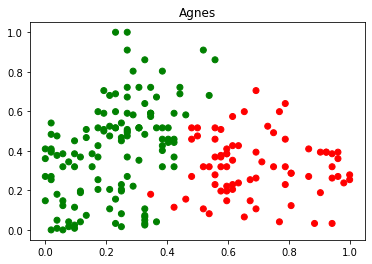

In [ ]:
plt.title('Agnes')
plt.scatter(data[:, 0], data[:, 1],  c=[colors[i] for i in label])

In [ ]:
agnes1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agnes1.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
label1 = agnes1.labels_
label1

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

K=3

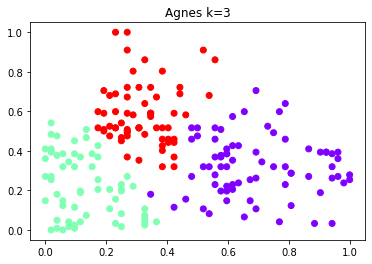

In [ ]:
plt.title('Agnes k=3')
plt.scatter(data[:, 0], data[:, 1],  c = label1 , cmap ='rainbow') 


In [ ]:
agnes2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agnes2.fit(data)
label2 = agnes2.labels_

K=4

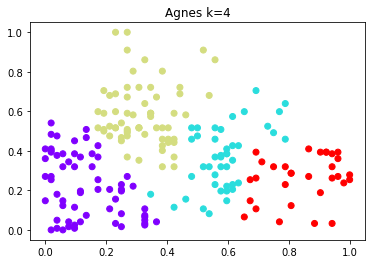

In [ ]:
plt.title('Agnes k=4')
plt.scatter(data[:, 0], data[:, 1],  c = label2 , cmap ='rainbow')


In [ ]:
agnes3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agnes3.fit(data)
label3 = agnes3.labels_

K=5

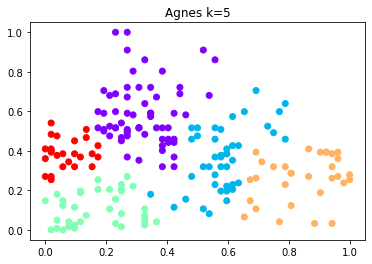

In [ ]:
plt.title('Agnes k=5')
plt.scatter(data[:, 0], data[:, 1],  c = label3 , cmap ='rainbow') 


In [ ]:
k = [2,3,4,5]
silhouette = [] 
silhouette.append(silhouette_score(data, label)) 
silhouette.append(silhouette_score(data, label1)) 
silhouette.append(silhouette_score(data, label2))
silhouette.append(silhouette_score(data, label3))  

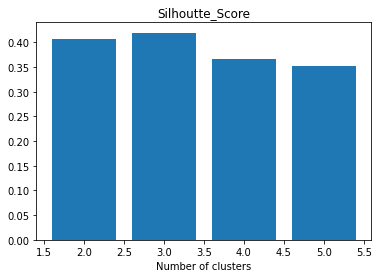

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('Silhoutte_Score')
plt.bar(k, silhouette)
plt.xlabel('Number of clusters') 
plt.show()


In [ ]:
silhouette_score(data, label)

0.4068199578610118

In [ ]:
ari = adjusted_rand_score(T, label)
ari

-0.004013839957561218

In [ ]:
nmi = normalized_mutual_info_score(T, label)
nmi

6.263431785801203e-05